In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Diabetes
### 1. Get-to-know

In [3]:
# loading the data from csv file to a Panda Dataframe
d_data = pd.read_csv('/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/Diabetes/diabetes.csv')

# printing the first 5 rows of the dataframe
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d_data.shape

(768, 9)

In [5]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
d_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
d_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Text(0, 0.5, 'outcome')

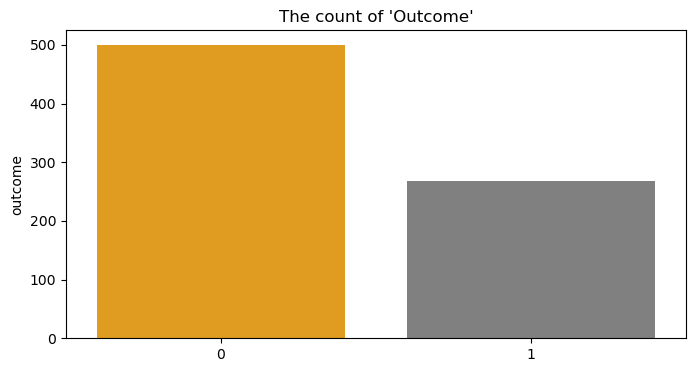

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title("The count of 'Outcome'")

# Bar chart
sns.barplot(x=d_data['Outcome'].value_counts().index, y=d_data['Outcome'].value_counts(),
            palette=['orange', 'grey'])

# Add label for vertical axis
plt.ylabel("outcome")

In [11]:
import plotly.express as px
fig = px.bar(d_data, x=d_data.Outcome.value_counts(),
             y=d_data.Outcome.value_counts(),
             color=[1, 0])
fig.show()

### 2. Clean data
- Our data has not any missing value but we have to deal with outliers.

In [12]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

def remove_upper_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] < (Q3 + 1.5*IQR)]

def remove_lower_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] > (Q1 - 1.5*IQR)]

- - #### 'BloodPressure'

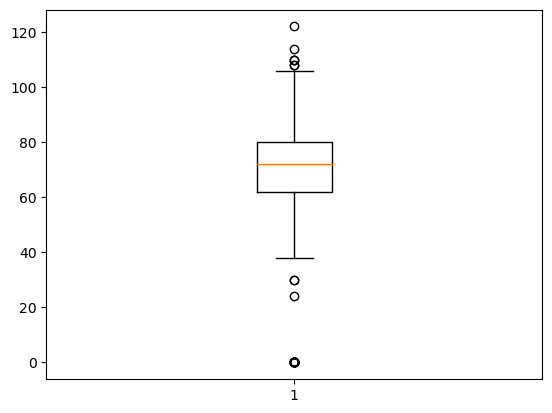

In [13]:
plt.boxplot(d_data.BloodPressure)
plt.show()

In [14]:
outliers_of(d_data, 'BloodPressure')

The number of upper outliers= 7

The number of lower outliers= 38

The percentage of outliers= 5.8999999999999995%


In [15]:
# heart_data = remove_upper_outliers(heart_data, 'trestbps')
# heart_data.shape

In [16]:
d_data = remove_lower_outliers(d_data, 'BloodPressure')
d_data.shape

(730, 9)

In [17]:
outliers_of(d_data, 'BloodPressure')

The number of upper outliers= 10

The number of lower outliers= 1

The percentage of outliers= 1.5%


- - #### 'Insulin'

In [18]:
d_data = remove_upper_outliers(d_data, 'Insulin')
d_data.shape

(697, 9)

In [19]:
outliers_of(d_data, 'Insulin')

The number of upper outliers= 4

The number of lower outliers= 0

The percentage of outliers= 0.6%


- - #### 'DiabetesPedigreeFunction'

In [20]:
d_data = remove_upper_outliers(d_data, 'DiabetesPedigreeFunction')
d_data.shape

(670, 9)

In [21]:
outliers_of(d_data, 'DiabetesPedigreeFunction')

The number of upper outliers= 12

The number of lower outliers= 0

The percentage of outliers= 1.7999999999999998%


### 3. Refine data
>We will use the Random Forest to define the important features at first.
#### Separating the features & Target

In [22]:
X = d_data.drop(columns='Outcome', axis=1)
y = d_data.Outcome

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, random_state=2)

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
imp_features = pd.Series(model.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)
imp_features

Glucose                     0.243617
BMI                         0.159809
Age                         0.147158
DiabetesPedigreeFunction    0.132878
Pregnancies                 0.089549
BloodPressure               0.086193
Insulin                     0.072645
SkinThickness               0.068151
dtype: float64

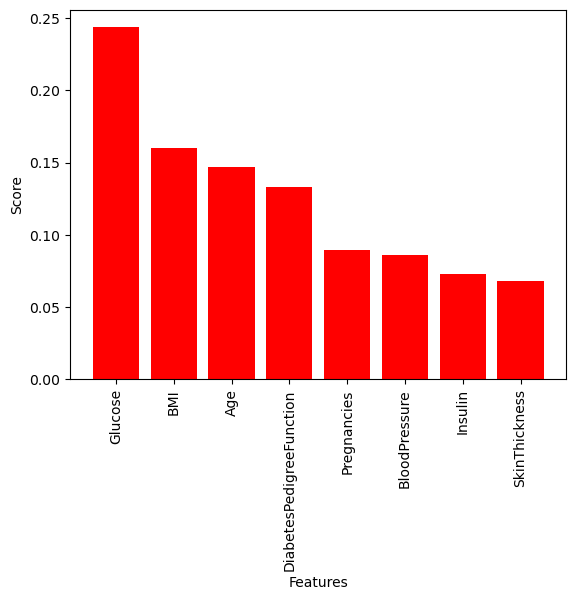

In [25]:
plt.bar(imp_features.index, imp_features, color="r")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation='vertical')
plt.show()

In [26]:
print(f'MAE= {mean_absolute_error(y_valid, y_pred)}')
# accuracy score on the valid data
print(f'\nAccuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')
print(f'\nThe valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')
print(f'\nThe confusion matrix:\n {confusion_matrix(y_valid, y_pred)}')
print(classification_report(y_valid, y_pred))
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

MAE= 0.208955223880597

Accuracy score of valid data= 0.7910447761194029
Accuracy score of training data= 1.0

The valid score of valid data= 79.1044776119403%
The train score of training data= 100.0%

The confusion matrix:
 [[79 12]
 [16 27]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        91
           1       0.69      0.63      0.66        43

    accuracy                           0.79       134
   macro avg       0.76      0.75      0.75       134
weighted avg       0.79      0.79      0.79       134

Precision= 0.6923076923076923
Recall= 0.627906976744186


## Data Standardization
### 1. Log Normalization
- If we want to find out whether or not we should use Log Normalization, we should calculate the variance of variables, then compare them.  

In [27]:
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'Pregnancies'= 
				11.352
The variance of 'Glucose'= 
				975.3
The variance of 'BloodPressure'= 
				144.677
The variance of 'SkinThickness'= 
				247.337
The variance of 'Insulin'= 
				6399.472
The variance of 'BMI'= 
				50.219
The variance of 'DiabetesPedigreeFunction'= 
				0.062
The variance of 'Age'= 
				139.942


>Because we have some features with min_0, we need to change them into the next value above_0 to log them as well. 

In [28]:
X.columns[1:]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [29]:
def replace_0_by_next(data):
    for i in data.columns[1:]:
        if data[i].min() == 0:
            col_lst = []
            for j in data[i].unique():
                if j != 0:
                    col_lst.append(j)
            col_lst_min = np.min(col_lst)
            data[i].replace(0, col_lst_min, inplace=True)
    print(data[data.columns[1:]].min())

In [30]:
replace_0_by_next(X)

Glucose                     44.000
BloodPressure               38.000
SkinThickness                7.000
Insulin                     15.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64


>But with 'Pregnancies', we will change 0 value to 0.001.

In [31]:
# X['Pregnancies'].replace(0, 0.001, inplace=True)

In [32]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

>We will apply for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [33]:
# X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']] = np.log(X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])
# for i in X.columns:
#     print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

In [34]:
# sns.pairplot(X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])

In [35]:
# sns.histplot(data=X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']],
#              kde=True)

### 2. Feature Scaling
- applied for K-Means, K-Nearest-Neighbor, PCA, Gradient Descent
- not used for Naive Bayes, Linear Discriminant Analysis, Tree-Based models

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)

In [37]:
df = pd.DataFrame(X_transformed, columns=X.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.625067,0.952053,-0.058116,0.932486,-0.776026,0.209493,0.787014,1.411368
1,-0.860022,-1.136299,-0.557317,0.478661,-0.776026,-0.818251,-0.317974,-0.195960
2,1.219103,2.112250,-0.723717,-1.185364,-0.776026,-1.302759,0.967175,-0.111364
3,-0.860022,-1.003706,-0.557317,0.024836,0.290249,-0.598020,-1.054632,-1.041922
4,0.328050,-0.108697,0.108284,-1.185364,-0.776026,-0.965071,-0.918511,-0.280556


<AxesSubplot:title={'center':'After Scaling'}, xlabel='Pregnancies', ylabel='Density'>

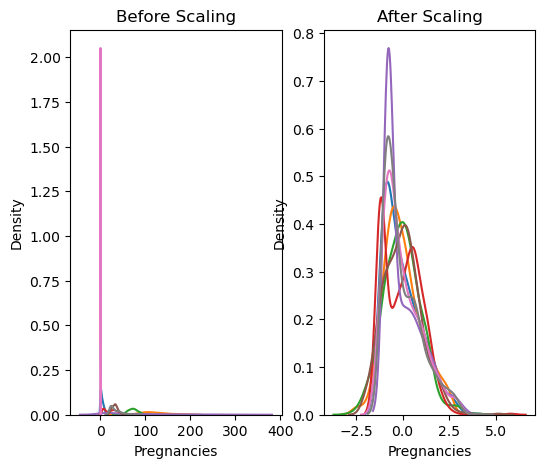

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['Pregnancies'], ax=ax1)
sns.kdeplot(X['Glucose'], ax=ax1)
sns.kdeplot(X['BloodPressure'], ax=ax1)
sns.kdeplot(X['SkinThickness'], ax=ax1)
sns.kdeplot(X['Insulin'], ax=ax1)
sns.kdeplot(X['BMI'], ax=ax1)
sns.kdeplot(X['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(X['Age'], ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(df['Pregnancies'], ax=ax2)
sns.kdeplot(df['Glucose'], ax=ax2)
sns.kdeplot(df['BloodPressure'], ax=ax2)
sns.kdeplot(df['SkinThickness'], ax=ax2)
sns.kdeplot(df['Insulin'], ax=ax2)
sns.kdeplot(df['BMI'], ax=ax2)
sns.kdeplot(df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(df['Age'], ax=ax2)


## Model Training

### 1. Create model


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [40]:
models = [LogisticRegression(solver='liblinear'),
          GaussianNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(criterion='entropy'),
          RandomForestClassifier(n_estimators=200),
          SVC(kernel='linear')]

In [41]:
AdaBoostClassifier(n_estimators=50, base_estimator=models[3], learning_rate=1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1)

In [42]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

[0.76119403 0.76119403 0.75373134 0.78358209 0.79104478]
[0.74626866 0.73880597 0.74626866 0.78358209 0.7761194 ]
[0.73880597 0.73134328 0.7238806  0.73880597 0.73134328]
[0.69402985 0.61940299 0.65671642 0.67910448 0.68656716]


[0.75373134 0.73134328 0.73880597 0.78358209 0.78358209]
[0.80597015 0.7761194  0.75373134 0.78358209 0.78358209]


In [43]:
cv_df

,model_name,accuracy
0,LogisticRegression,0.770149
1,GaussianNB,0.758209
2,KNeighborsClassifier,0.732836
3,DecisionTreeClassifier,0.667164
4,RandomForestClassifier,0.758209
5,SVC,0.780597


Text(0.5, 1.0, 'Accuracies of Algorithms')

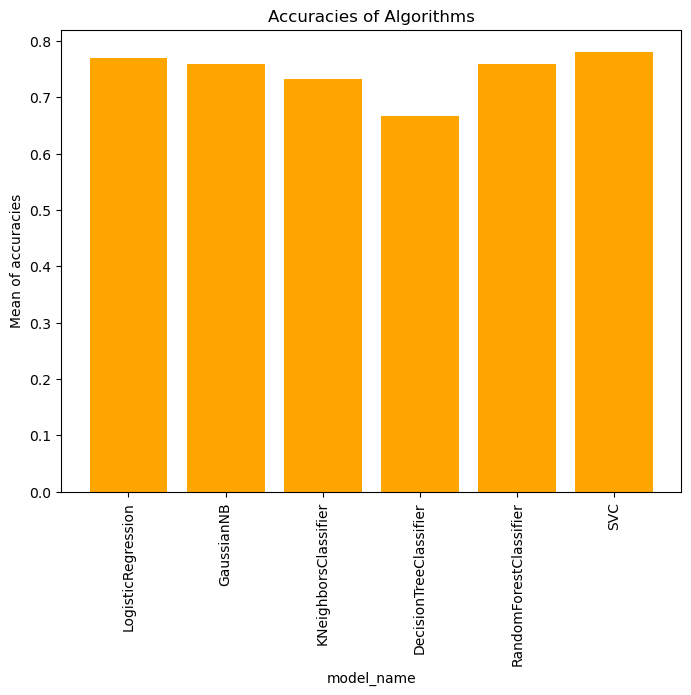

In [44]:
plt.figure(figsize=(8, 6))
plt.bar(cv_df['model_name'], cv_df['accuracy'], color='orange')
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title('Accuracies of Algorithms')

#### Applying AdaBoost for Decision Tree

In [45]:
model = AdaBoostClassifier(n_estimators=50, base_estimator=models[3], learning_rate=1)
print(f'Accuracy scores of the data= {cross_val_score(model, X, y)}')

Accuracy scores of the data= [0.68656716 0.63432836 0.69402985 0.70149254 0.71641791]


#### Splitting the data to training data & valid data

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

#### Training model

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [48]:
print(mean_absolute_error(y_valid, y_pred))

0.2537313432835821


### 3. Evaluate model
#### Accuracy Score

In [49]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.746268656716418
Accuracy score of training data= 1.0


In [50]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 74.6268656716418%
The train score of training data= 100.0%


#### Performance Metric

In [51]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[81 23]
 [11 19]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       104
           1       0.45      0.63      0.53        30

    accuracy                           0.75       134
   macro avg       0.67      0.71      0.68       134
weighted avg       0.78      0.75      0.76       134



#### Precision and Recall

In [52]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.4523809523809524
Recall= 0.6333333333333333


In [53]:
input_data = (2,197,70,45,543,30.5,0.158,53)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have a Diabetes Disease.")
else:
    print("The Person has Diabetes Disease.")  


[1]
The Person has Diabetes Disease.


#### Training model with K-fold

In [54]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 70.896% (6.376%)


In [55]:
model.fit(X, y)
input_data = (2,197,70,45,543,30.5,0.158,53)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have a Diabetes Disease.")
else:
    print("The Person has Diabetes Disease.")  

[0]
The Person does not have a Diabetes Disease.
